# Data Cleaning and Integrity in lettuce_dataset_updated Dataset
This notebook demonstrates data cleaning operations such as handling missing data, removing duplicates, standardizing data, and detecting outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'C:\Users\user\Downloads\oasis\lettuce_dataset_updated.csv'
data = data = pd.read_csv(file_path, encoding='ISO-8859-1')
# or use latin1
# data = pd.read_csv(file_path, encoding='latin1')


# Display basic info and first few rows of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (°C)  3169 non-null   float64
 3   Humidity (%)      3169 non-null   int64  
 4   TDS Value (ppm)   3169 non-null   int64  
 5   pH Level          3169 non-null   float64
 6   Growth Days       3169 non-null   int64  
 7   Temperature (F)   3169 non-null   float64
 8   Humidity          3169 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 222.9+ KB


,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Temperature (F),Humidity
0,1,8/3/2023,33.4,53,582,6.4,1,92.12,0.53
1,1,8/4/2023,33.5,53,451,6.1,2,92.30,0.53
2,1,8/5/2023,33.4,59,678,6.4,3,92.12,0.59
3,1,8/6/2023,33.4,68,420,6.4,4,92.12,0.68
4,1,8/7/2023,33.4,74,637,6.5,5,92.12,0.74


## Step 1: Handling Missing Data

In [2]:
missing_data_summary = data.isnull().sum()
missing_percentage = (missing_data_summary / len(data)) * 100
print(f"Missing Data Summary:\n{missing_data_summary[missing_data_summary > 0]}")
print(f"Missing Data Percentage:\n{missing_percentage[missing_percentage > 0]}")

# Step 2: Handling missing values
def handle_missing_data(df):
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        
        # Skip columns with no missing data
        if missing_count == 0:
            continue
        
        # Handle missing numeric columns
        if df[col].dtype in ['float64', 'int64']:
            mean_value = df[col].mean()
            median_value = df[col].median()
            
            # If data is normally distributed, fill with mean; otherwise use median
            df[col].fillna(median_value, inplace=True)
            print(f"Filled missing numeric values in '{col}' with median: {median_value}")
        
        # Handle missing categorical columns
        elif df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            
            # Fill categorical columns with the most frequent value (mode)
            df[col].fillna(mode_value, inplace=True)
            print(f"Filled missing categorical values in '{col}' with mode: {mode_value}")
        
        # Handle missing datetime columns
        elif np.issubdtype(df[col].dtype, np.datetime64):
            # Fill datetime columns with the most common or nearest date
            most_frequent_date = df[col].mode()[0]
            df[col].fillna(most_frequent_date, inplace=True)
            print(f"Filled missing datetime values in '{col}' with mode: {most_frequent_date}")
    
    return df

# Apply missing data handling
data_cleaned = handle_missing_data(data)

# Step 3: Verify that no missing data remains
missing_data_cleaned_summary = data_cleaned.isnull().sum()
print(f"\nMissing Data After Cleaning:\n{missing_data_cleaned_summary[missing_data_cleaned_summary > 0]}")


Missing Data Summary:
Series([], dtype: int64)
Missing Data Percentage:
Series([], dtype: float64)

Missing Data After Cleaning:
Series([], dtype: int64)


## Step 2: Removing Duplicates

In [3]:
# Drop duplicate rows if any
data.drop_duplicates(inplace=True)

# Verify that duplicates are removed
data.duplicated().sum()

np.int64(0)

## Step 3: Standardizing Data

In [4]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the head to verify standardization
data.head()

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Temperature (F),Humidity
0,-1.701649,8/3/2023,1.125915,-1.321099,-0.138688,0.003366,-1.693383,1.125915,-1.321099
1,-1.701649,8/4/2023,1.147329,-1.321099,-1.270977,-1.276599,-1.616901,1.147329,-1.321099
2,-1.701649,8/5/2023,1.125915,-0.653510,0.691082,0.003366,-1.540420,1.125915,-0.653510
3,-1.701649,8/6/2023,1.125915,0.347874,-1.538924,0.003366,-1.463938,1.125915,0.347874
4,-1.701649,8/7/2023,1.125915,1.015463,0.336701,0.430021,-1.387457,1.125915,1.015463


## Step 4: Outlier Detection using IQR

In [5]:
outliers = pd.DataFrame()
for col in numeric_columns:
    outliers[col] = np.abs(data[col]) > 3  # Marks True for outliers

# Display rows with outliers
outlier_rows = data[outliers.any(axis=1)]
print(f"Outlier Rows:\n{outlier_rows}")

Outlier Rows:
Empty DataFrame
Columns: [Plant_ID, Date, Temperature (°C), Humidity (%), TDS Value (ppm), pH Level, Growth Days, Temperature (F), Humidity]
Index: []


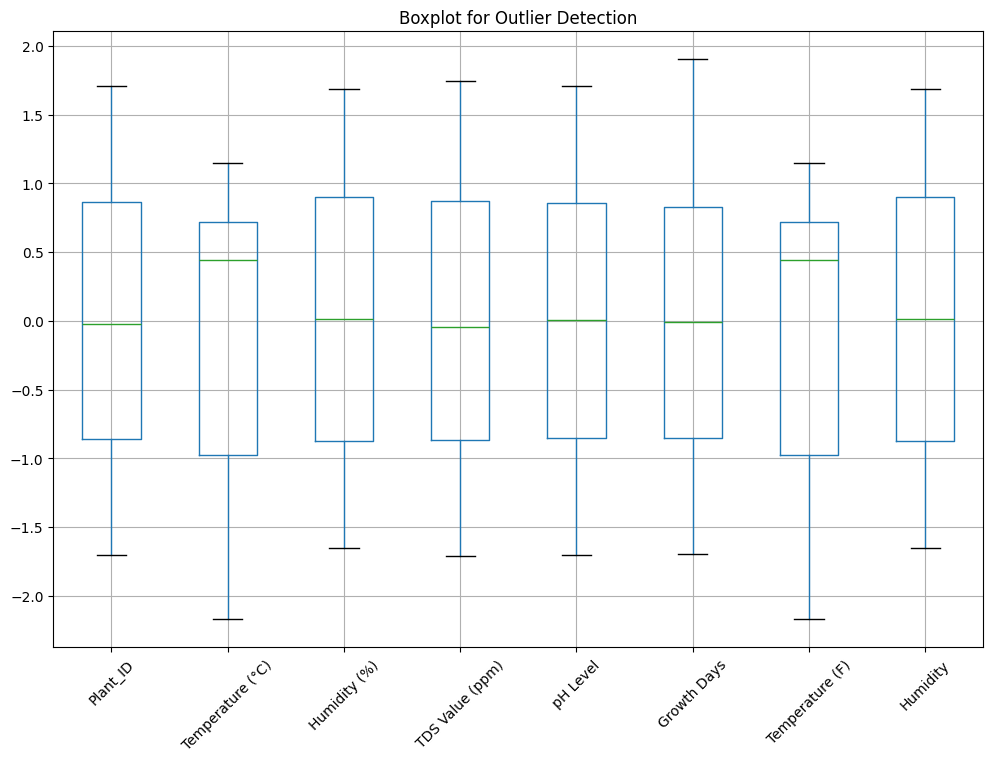

In [6]:
plt.figure(figsize=(12, 8))

# Ensure column names are passed correctly
data.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.show()